In [67]:
# ------------------------------------------------ #
#        this is the plotting scipt for            #
# Sampson+23 Score-based diffusion for deblending  #
# Author: Matt Sampson                             #
# ------------------------------------------------ #

# imports
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
import cmasher as cmr

In [68]:
# consitent plotting style
plt.rcParams["xtick.top"] = True 
plt.rcParams["ytick.right"] = True
plt.rcParams["xtick.direction"] = 'in' 
plt.rcParams["ytick.direction"] = 'in' 
plt.rcParams["xtick.minor.visible"] = True 
plt.rcParams["ytick.minor.visible"] = True 
plt.rcParams["xtick.major.size"] = 7
plt.rcParams["xtick.minor.size"] = 4.5
plt.rcParams["ytick.major.size"] = 7
plt.rcParams["ytick.minor.size"] = 4.5
plt.rcParams["xtick.major.width"] = 2
plt.rcParams["xtick.minor.width"] = 1.5
plt.rcParams["ytick.major.width"] = 2
plt.rcParams["ytick.minor.width"] = 1.5
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams.update({"text.usetex": True})

In [69]:
# trial params
num_trials  = 2000
spec_weight = 1
batch_num   = 1

In [70]:
PREFIX = '/Users/mattsampson/Research/Melchior/scarlet_development/'
NAME   = 'metrics_batch_' + str(batch_num) + 'specWeight_'+ str(spec_weight) + '_nTrials_' + str(num_trials)

In [71]:
# load in the data
x = np.load(PREFIX + NAME + '_x.npy')
y = np.load(PREFIX + NAME + '_y.npy')
x2 = np.load(PREFIX + NAME + '_x2.npy')
y2 = np.load(PREFIX + NAME + '_y2.npy')
x3 = np.load(PREFIX + NAME + '_x3.npy')
y3 = np.load(PREFIX + NAME + '_y3.npy')
x4 = np.load(PREFIX + NAME + '_x4.npy')
y4 = np.load(PREFIX + NAME + '_y4.npy')
x5 = np.load(PREFIX + NAME + '_x5.npy')
y5 = np.load(PREFIX + NAME + '_y5.npy')
x6 = np.load(PREFIX + NAME + '_x6.npy')
y6 = np.load(PREFIX + NAME + '_y6.npy')
b1 = np.load(PREFIX + NAME + '_b1.npy')
b2 = np.load(PREFIX + NAME + '_b2.npy')
b3 = np.load(PREFIX + NAME + '_b3.npy')
b4 = np.load(PREFIX + NAME + '_b4.npy')
b5 = np.load(PREFIX + NAME + '_b5.npy')
b6 = np.load(PREFIX + NAME + '_b6.npy')

<Figure size 640x480 with 0 Axes>

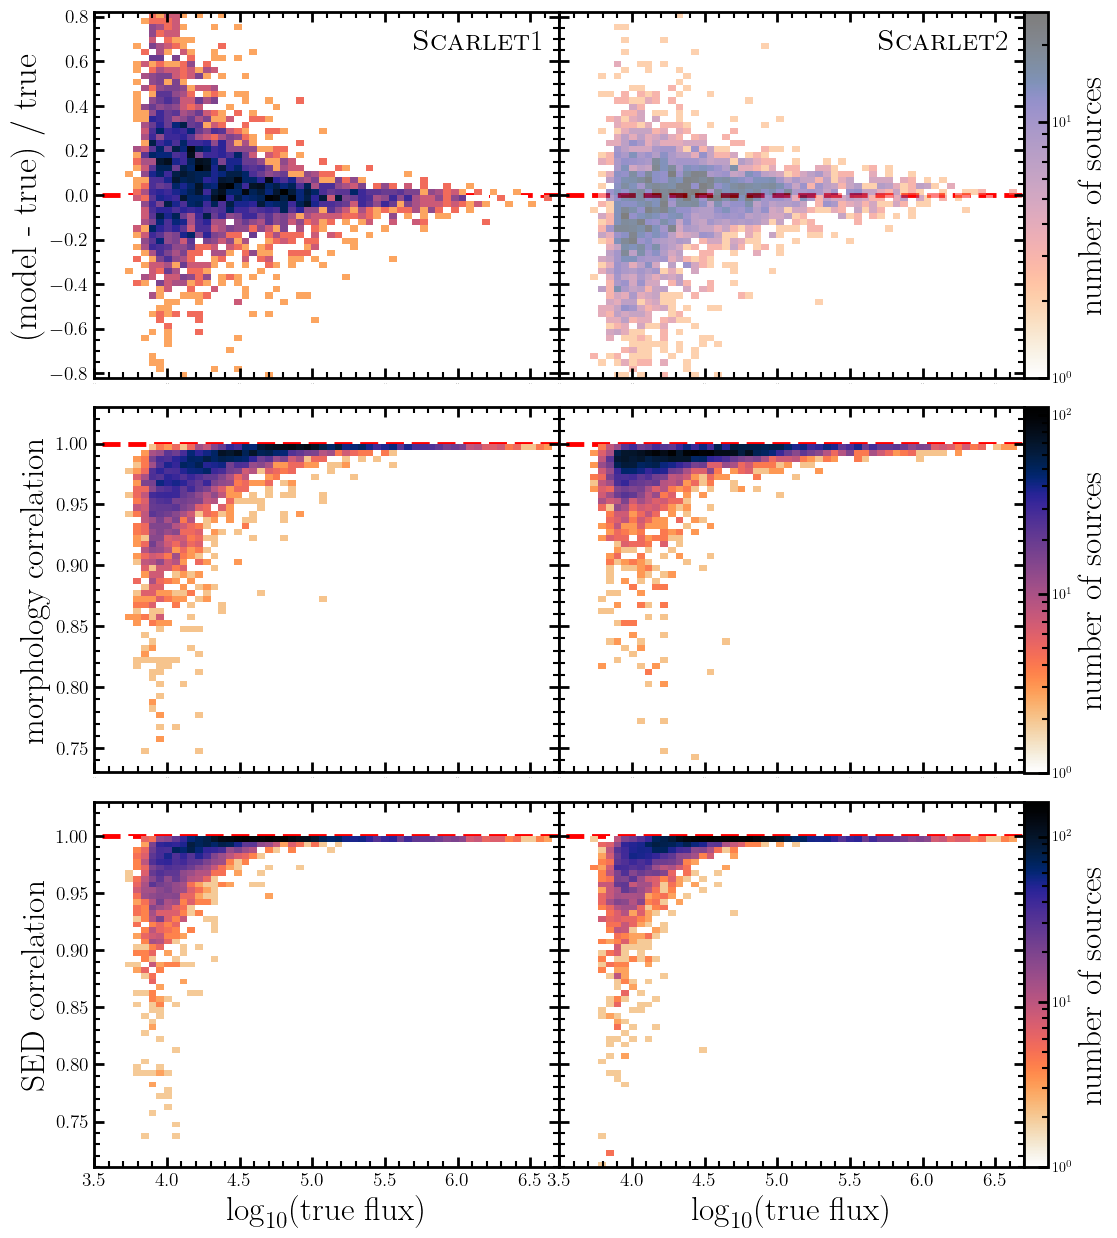

In [184]:
# ------------------------------------------------ #
# plot 1: error metrics as a function of true flux #
# ------------------------------------------------ #
cMAP = cmr.get_sub_cmap("cmr.torch_r", 0.0, 0.99)#'cmr.chroma'
#cMAP = 'cmr.rainforest_r'
lw = 3.5
low_x = 3.5
hi_x = 6.7
bins = 60
m1 = 22
cl = 'red'
# range for hists
range_1 = np.array([[low_x, hi_x], [-0.82, 0.82]])
range_2 = np.array([[low_x, hi_x], [0.7, 1]])
range_3 = np.array([[low_x, hi_x], [0.7, 1]])

# for maximum color values
p1 = plt.hist2d(x, y, bins=bins, range=range_1, density=False, cmin=1)
vmin1, vmax1 = p1[-1].get_clim()
p2 = plt.hist2d(x2, y2, bins=bins, range=range_1, density=False, cmin=1)
vmin2, vmax2 = p2[-1].get_clim()
max1 = np.max([vmax1, vmax2])
min1 = np.min([vmin1, vmin2])
#max1 = m1


p3 = plt.hist2d(x3, y3, bins=bins, range=range_2, density=False, cmin=1)
vmin1, vmax1 = p3[-1].get_clim()
p4 = plt.hist2d(x4, y4, bins=bins, range=range_2, density=False, cmin=1)
vmin2, vmax2 = p4[-1].get_clim()
max2 = np.max([vmax1, vmax2])
min2 = np.min([vmin1, vmin2])

p5 = plt.hist2d(x5, y5, bins=bins, range=range_3, density=False, cmin=1)
vmin1, vmax1 = p5[-1].get_clim()
p6 = plt.hist2d(x6, y6, bins=bins, range=range_3, density=False, cmin=1)
vmin2, vmax2 = p6[-1].get_clim()
max3 = np.max([vmax1, vmax2])
min3 = np.min([vmin1, vmin2])
plt.clf()

# the big boi
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15),dpi=100)
plt.subplot(3,2,1)
plt.hist2d(x, y, [bins, bins], 
            range=range_1, 
            cmap=cMAP, 
            density=False, 
            cmin=1, 
            norm=colors.LogNorm(vmin=min1, vmax=max1))
            #vmin=min1, vmax=max1)
plt.hlines(0, -100, 100, color=cl, linestyle='--',linewidth=lw, zorder=0)
plt.xlim(low_x, hi_x)
plt.ylim(-.82, .82)
plt.xticks(fontsize=0)
plt.yticks(fontsize=14)
plt.text(5.7, 0.65, r'$\textsc{Scarlet}1$', fontsize=21, color='k')
#plt.xlabel(r'$\log_{10}$(true flux)',fontsize=25)
plt.ylabel('(model - true) / true',fontsize=25)

# now scarlet 2
plt.subplot(3,2,2)
im1 = plt.hist2d(x2, y2, [bins,bins], 
                range=range_1, 
                cmap=cMAP, 
                density=False, 
                cmin=1, 
                alpha=1,
                norm=colors.LogNorm(vmin=min1, vmax=max1))
                #vmin=min1, vmax=max1)
plt.hlines(0, -100, 100, color=cl, linestyle='--',linewidth=lw, zorder=0)
plt.ylim(-.82, .82)
plt.text(5.7, 0.65, r'$\textsc{Scarlet}2$', fontsize=21, color='k')
plt.xlim(low_x, hi_x)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)
#plt.xlabel(r'$\log_{10}$(true flux)',fontsize=25)

plt.subplot(3,2,3)
plt.hlines(1, -100, 100, color=cl, linestyle='--',linewidth=lw, zorder=0)
plt.hist2d(x3, y3, [bins,bins], 
            range=range_2, 
            cmap=cMAP, 
            density=False, 
            cmin=1, 
            norm=colors.LogNorm(vmin=min2, vmax=max2))
            #vmin=min2, vmax=max2)
plt.xlim(low_x, hi_x)
plt.ylim(.73, 1.03)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel(r'$\log_{10}$(true flux)',fontsize=24)
plt.xticks(fontsize=0)
plt.ylabel('morphology correlation',fontsize=24)

# now scarlet 2
plt.subplot(3,2,4)
plt.hlines(1, -100, 100, color=cl, linestyle='--',linewidth=lw, zorder=0)
plt.yticks(fontsize=0)
plt.xticks(fontsize=14)
im2 = plt.hist2d(x4, y4, [bins,bins], 
                    range=range_2, 
                    cmap=cMAP, 
                    density=False, 
                    cmin=1, 
                    norm=colors.LogNorm(vmin=min2, vmax=max2))
                    #vmin=min2, vmax=max2)
plt.ylim(.73, 1.03)
plt.xlim(low_x, hi_x)
plt.xticks(fontsize=0)
#plt.xlabel(r'$\log_{10}$(true flux)',fontsize=24)

plt.subplot(3,2,5)
plt.hlines(1, -100, 100, color=cl, linestyle='--',linewidth=lw, zorder=0)
plt.hist2d(x5, y5, [bins,bins], 
            range=range_3, 
            cmap=cMAP, 
            density=False, 
            cmin=1, 
            norm=colors.LogNorm(vmin=min3, vmax=max3))
            #vmin=min3, vmax=max3)
plt.xlim(low_x, hi_x)
plt.ylim(.71, 1.03)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$\log_{10}$(true flux)',fontsize=24)
plt.ylabel('SED correlation',fontsize=24)

# now scarlet 2
plt.subplot(3,2,6)
plt.hlines(1, -100, 100, color=cl, linestyle='--',linewidth=lw, zorder=0)
plt.yticks(fontsize=0)
plt.xticks(fontsize=14)
im3 = plt.hist2d(x6, y6, [bins,bins], 
                range=range_3, 
                cmap=cMAP, 
                density=False, 
                cmin=1, 
                norm=colors.LogNorm(vmin=min3, vmax=max3))
                #vmax=max3)
plt.ylim(.71, 1.03)
plt.xlim(low_x, hi_x)
plt.xlabel(r'$\log_{10}$(true flux)',fontsize=24)

plt.subplots_adjust(wspace=.0, hspace=.08)
#plt.colorbar(im3[3], orientation="vertical",fraction=0.07,anchor=(5.0,0.0))
cbar_ax = fig.add_axes([0.9, 0.11, 0.02, 0.2438])
cbar = plt.colorbar(im3[3], cax=cbar_ax)
cbar.set_label(r'number of sources',fontsize=24)

cbar_ax2 = fig.add_axes([0.9, 0.373, 0.02, 0.2438])
cbar2 = plt.colorbar(im2[3], cax=cbar_ax2)
cbar2.set_label(r'number of sources',fontsize=24)

cbar_ax2 = fig.add_axes([0.9, 0.6363, 0.02, 0.2438])
cbar2 = plt.colorbar(im1[3], cax=cbar_ax2)
cbar2.set_label(r'number of sources',fontsize=24)

prior = 'HSC'
name = 'LOADED_flux_' + str(prior) + '_flux_specWeight_' + str(spec_weight) + '_nTrials_' + str(num_trials) + '.pdf'
name2 = 'LOADED_flux_' + str(prior) + '_flux_specWeight_' + str(spec_weight) +'_nTrials_' + str(num_trials) + '.png'
plt.savefig(name, bbox_inches='tight',dpi=200)
plt.savefig(name2, bbox_inches='tight',dpi=200)

plt.show()

<Figure size 640x480 with 0 Axes>

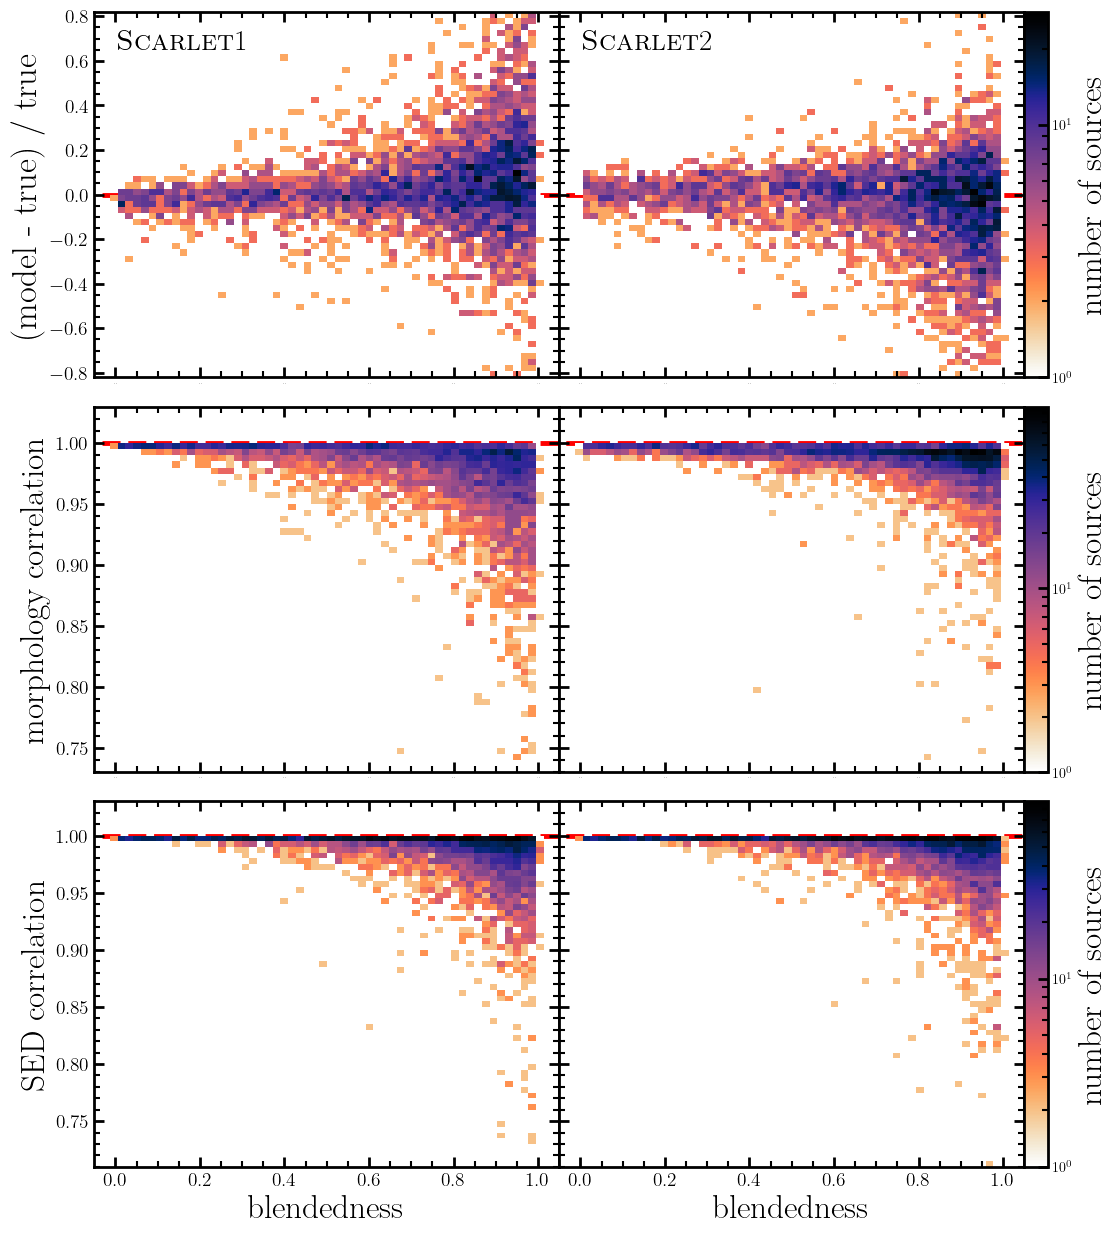

In [185]:
# ------------------------------------------------------- #
# plot 2: error metrics as a function of true blendedness #
# ------------------------------------------------------- #
m_size = 20
low_x = -0.05
hi_x = 1.05

# range for hists
range_1 = np.array([[low_x, hi_x], [-0.82, 0.82]])
range_2 = np.array([[low_x, hi_x], [0.7, 1]])
range_3 = np.array([[low_x, hi_x], [0.7, 1]])

# for maximum color values
p1 = plt.hist2d(b1, y, bins=bins, range=range_1, density=False, cmin=1)
vmin1, vmax1 = p1[-1].get_clim()
p2 = plt.hist2d(b2, y2, bins=bins, range=range_1, density=False, cmin=1)
vmin2, vmax2 = p2[-1].get_clim()
max1 = np.max([vmax1, vmax2])
min1 = np.min([vmin1, vmin2])
#max1 = m1

p3 = plt.hist2d(b3, y3, bins=bins, range=range_2, density=False, cmin=1)
vmin1, vmax1 = p3[-1].get_clim()
p4 = plt.hist2d(b4, y4, bins=bins, range=range_2, density=False, cmin=1)
vmin2, vmax2 = p4[-1].get_clim()
max2 = np.max([vmax1, vmax2])
min2 = np.min([vmin1, vmin2])

p5 = plt.hist2d(b5, y5, bins=bins, range=range_3, density=False, cmin=1)
vmin1, vmax1 = p5[-1].get_clim()
p6 = plt.hist2d(b6, y6, bins=bins, range=range_3, density=False, cmin=1)
vmin2, vmax2 = p6[-1].get_clim()
max3 = np.max([vmax1, vmax2])
min3 = np.min([vmin1, vmin2])
plt.clf()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15),dpi=100)
plt.subplot(3,2,1)
plt.hist2d(b1, y, [bins,bins], 
            range=range_1, 
            cmap=cMAP, 
            density=False, 
            cmin=1, 
            norm=colors.LogNorm(vmin=min1, vmax=max1))
            #vmin=min1, vmax=max1)
plt.hlines(0, -100, 100, color=cl, linestyle='--',linewidth=lw, zorder=0)
plt.xlim(low_x, hi_x)
plt.ylim(-.82, .82)
plt.xticks(fontsize=0)
plt.yticks(fontsize=14)
plt.text(0.005, 0.65, r'$\textsc{Scarlet}1$', fontsize=21, color='k')
plt.ylabel('(model - true) / true',fontsize=25)

# now scarlet 2
plt.subplot(3,2,2)
im1 = plt.hist2d(b2, y2, [bins,bins], 
                range=range_1, 
                cmap=cMAP, 
                density=False, 
                cmin=1, 
                norm=colors.LogNorm(vmin=min1, vmax=max1))
                #vmin=min1, vmax=max1)
plt.hlines(0, -100, 100, color=cl, linestyle='--',linewidth=lw, zorder=0)
plt.ylim(-.82, .82)
plt.text(0.005, 0.65, r'$\textsc{Scarlet}2$', fontsize=21, color='k')
plt.xlim(low_x, hi_x)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

plt.subplot(3,2,3)
plt.hlines(1, -100, 100, color=cl, linestyle='--',linewidth=lw, zorder=0)
plt.hist2d(b3, y3, [bins,bins], 
            range=range_2, 
            cmap=cMAP, 
            density=False, 
            cmin=1, 
            norm=colors.LogNorm(vmin=min2, vmax=max2))
            #vmin=min2, vmax=max2)
plt.xlim(low_x, hi_x)
plt.ylim(.73, 1.03)
plt.xticks(fontsize=0)
plt.yticks(fontsize=14)
plt.ylabel('morphology correlation',fontsize=24)

# now scarlet 2
plt.subplot(3,2,4)
plt.hlines(1, -100, 100, color=cl, linestyle='--',linewidth=lw, zorder=0)
plt.yticks(fontsize=0)
plt.xticks(fontsize=14)
im2 = plt.hist2d(b4, y4, [bins,bins], 
                range=range_2, 
                cmap=cMAP, 
                density=False, 
                cmin=1, 
                norm=colors.LogNorm(vmin=min2, vmax=max2))
                #vmin=min2, vmax=max2)
plt.ylim(.73, 1.03)
plt.xlim(low_x, hi_x)
plt.xticks(fontsize=0)

plt.subplot(3,2,5)
plt.hlines(1, -100, 100, color=cl, linestyle='--',linewidth=lw, zorder=0)
plt.hist2d(b5, y5, [bins,bins], 
            range=range_3, 
            cmap=cMAP, 
            density=False, 
            cmin=1, 
            norm=colors.LogNorm(vmin=min3, vmax=max3))
            #vmin=min3, vmax=max3)
plt.xlim(low_x, hi_x)
plt.ylim(.71, 1.03)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'blendedness',fontsize=24)
plt.ylabel('SED correlation',fontsize=24)

# now scarlet 2
plt.subplot(3,2,6)
plt.hlines(1, -100, 100, color=cl, linestyle='--',linewidth=lw, zorder=0)
plt.yticks(fontsize=0)
plt.xticks(fontsize=14)
im3 = plt.hist2d(b6, y6, [bins,bins], 
                range=range_3, 
                cmap=cMAP, 
                density=False, 
                cmin=1, 
                norm=colors.LogNorm(vmin=min3, vmax=max3))
                #vmin=min3, vmax=max3)
plt.ylim(.71, 1.03)
plt.xlim(low_x, hi_x)
plt.xlabel(r'blendedness',fontsize=24)

plt.subplots_adjust(wspace=.0, hspace=.08)
cbar_ax = fig.add_axes([0.9, 0.11, 0.02, 0.2438])
cbar = plt.colorbar(im3[3], cax=cbar_ax)
cbar.set_label(r'number of sources',fontsize=24)

cbar_ax2 = fig.add_axes([0.9, 0.373, 0.02, 0.2438])
cbar2 = plt.colorbar(im2[3], cax=cbar_ax2)
cbar2.set_label(r'number of sources',fontsize=24)

cbar_ax2 = fig.add_axes([0.9, 0.6363, 0.02, 0.2438])
cbar2 = plt.colorbar(im1[3], cax=cbar_ax2)
cbar2.set_label(r'number of sources',fontsize=24)

name = 'LOADED_flux_' + str(prior) + '_blended_specWeight_' + str(spec_weight) + '_nTrials_' + str(num_trials) + '.pdf'
name2 = 'LOADED_flux_' + str(prior) + '_blended_specWeight_' + str(spec_weight) +'_nTrials_' + str(num_trials) + '.png'
plt.savefig(name, bbox_inches='tight',dpi=200)
plt.savefig(name2, bbox_inches='tight',dpi=200)

plt.show()

In [157]:
print(f'mean SED correlation SCARLET1: {np.mean(y5):.3f}')
print(f'mean SED correlation SCARLET2: {np.mean(y6):.3f}')

mean SED correlation SCARLET1: 0.964
mean SED correlation SCARLET2: 0.974
